In [4]:
import requests
from bs4 import BeautifulSoup
import os
import io
import urllib.parse
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import base64
from PIL import Image


In [ ]:
def get_images_urls(driver, query, max_number_of_pages=2, page_range=None):
    query_encoded = query.replace(" ", "+")
    urls = []
    if page_range is None:
        page_range = (0, max_number_of_pages)
    for i in range(page_range[0], page_range[1]):
        url = f"https://www.google.com/search?q={query_encoded}&tbm=isch&ijn={i}"
        driver.get(url)
        time.sleep(3)  # Wait for the page to load completely
        rendered_html = driver.page_source
        soup = BeautifulSoup(rendered_html, "html.parser")
        img_tags = soup.find_all("img")

        # Create a list to store image URLs (both HTTP and data URIs)
        for img in img_tags:
            src = img.get("src")
            if src:
                urls.append(src)
    driver.quit()
    
    return urls

In [6]:
urls

NameError: name 'urls' is not defined

In [57]:
def download_images(image_urls, data_dir, query, number_of_images=None, check_size=(120, 120)):
    """
    Downloads images from a list of URLs (data URLs or HTTP URLs) and saves them
    in a subdirectory named after the query under data_dir. Optionally, only images
    that are at least check_size (width, height) are saved.
    """
    # Create output directory using os.path.join
    output_dir = os.path.join(data_dir, query)
    os.makedirs(output_dir, exist_ok=True)
    counter = 0

    # If number_of_images is None, process all images
    if number_of_images is None:
        number_of_images = len(image_urls)

    for idx, img_url in enumerate(image_urls):
        if number_of_images and counter >= number_of_images:
            break
        try:
            image_data = None
            ext = ".jpg"  # default extension for JPEG images

            if img_url.startswith("data:image/jpeg"):
                # --- Handle Data URLs for JPEG ---
                # Data URLs are in the format: data:[<MIME-type>][;charset=<encoding>][;base64],<data>
                header, base64_data = img_url.split(",", 1)
                if "image/jpeg" in header:
                    ext = ".jpg"
                else:
                    raise ValueError(f"Unknown image type in header: {header}")
                image_data = base64.b64decode(base64_data)

            elif img_url.startswith("http") and img_url.lower().endswith((".jpg", ".jpeg")):
                # --- Handle HTTP URLs for JPEG images ---
                response = requests.get(img_url, stream=True)
                if response.status_code == 200:
                    image_data = response.content
                    content_type = response.headers.get("Content-Type", "")
                    if "jpeg" in content_type.lower():
                        ext = ".jpg"
                    else:
                        raise ValueError(f"Unknown content type: {content_type}")
                else:
                    print(f"Failed to download {img_url} - status code {response.status_code}")
                    continue

            else:
                print(f"Unknown URL format: {img_url}")
                continue

            # If size checking is enabled, verify that the image meets the minimum dimensions
            if check_size is not None and image_data:
                try:
                    image = Image.open(io.BytesIO(image_data))
                    width, height = image.size
                    min_width, min_height = check_size
                    if width < min_width or height < min_height:
                        print(f"Image too small ({width}x{height}): {img_url}")
                        continue
                except Exception as size_error:
                    print(f"Failed to check size for {img_url}: {size_error}")
                    continue

            # Save the image data to a file
            file_path = os.path.join(output_dir, f"image_{idx}{ext}")
            with open(file_path, "wb") as f:
                f.write(image_data)
            counter += 1
            print(f"Saved: {file_path}")

        except Exception as e:
            print(f"Error processing {img_url}: {e}")


In [13]:
# Set up Selenium 
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=chrome_options)

# Get image URLs    
query = "angry faces"
max_number_of_pages = 4
image_urls = get_images_urls(driver, query, max_number_of_pages, page_range=(4, 5))

# # Download images   
# data_dir = "../data/"
# download_images(image_urls, data_dir, query, number_of_images=20, check_size=(120,120))

['https://fonts.gstatic.com/s/i/productlogos/googleg/v6/24px.svg',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAATklEQVQ4jWNkgAJZaYX/DESCx08fMGIIkmIAMmChxKDHTx8wYhgAkyCkGWYRE7G2oWuEAZINQAejBgwLA7CmRAYG8vMG0Rph6nC6gFjDAO3DFC5XKUBtAAAAAElFTkSuQmCC',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP/
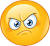
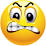
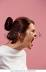
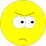
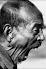
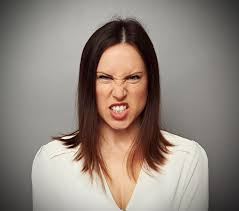
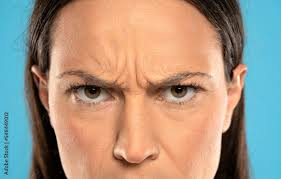
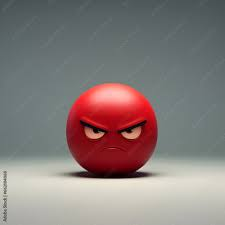
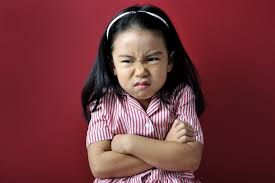
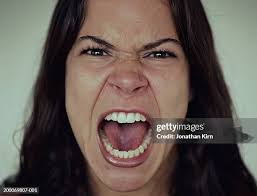
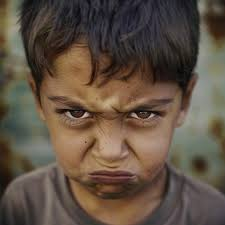
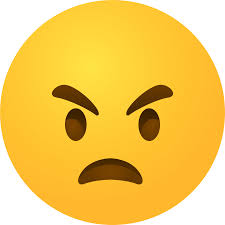
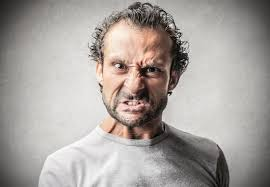
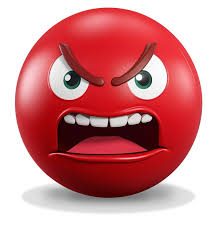
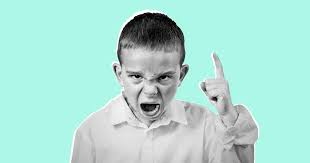
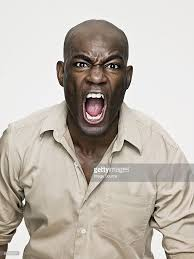
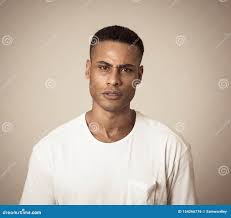
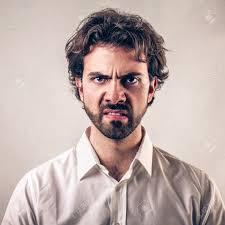
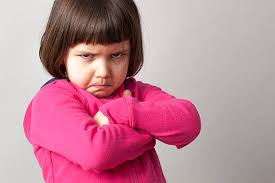
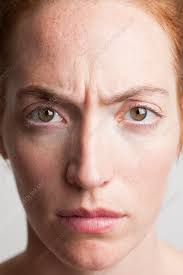
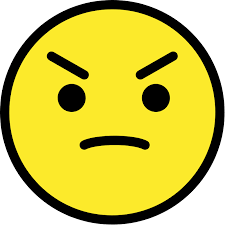
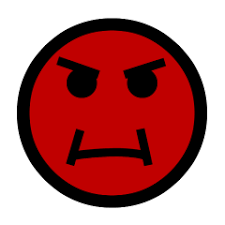
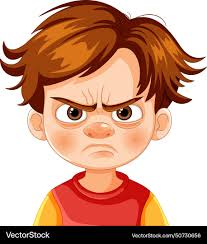
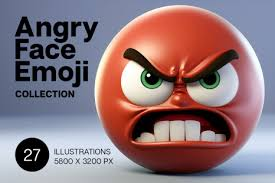
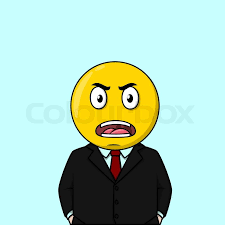
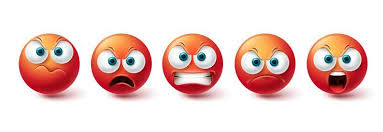
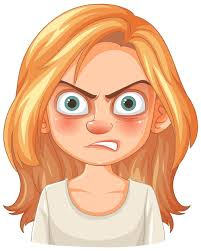
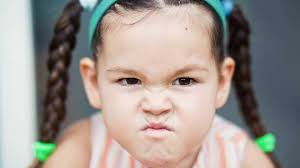
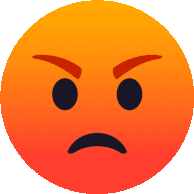
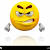
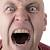
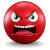
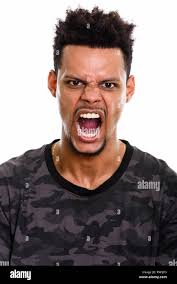
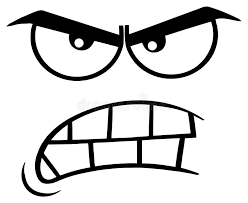
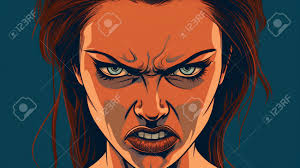
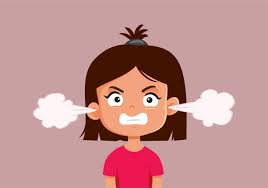

In [14]:
image_urls

['https://fonts.gstatic.com/s/i/productlogos/googleg/v6/24px.svg',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAATklEQVQ4jWNkgAJZaYX/DESCx08fMGIIkmIAMmChxKDHTx8wYhgAkyCkGWYRE7G2oWuEAZINQAejBgwLA7CmRAYG8vMG0Rph6nC6gFjDAO3DFC5XKUBtAAAAAElFTkSuQmCC',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 '',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP/
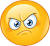
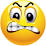
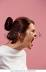
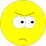
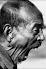
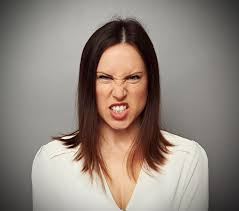
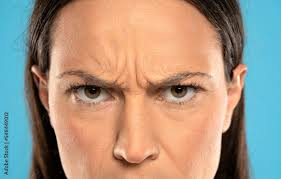
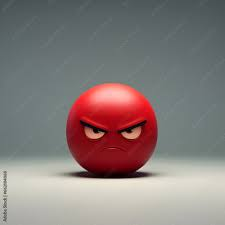
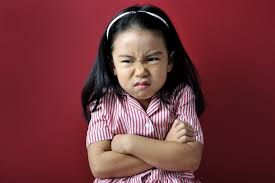
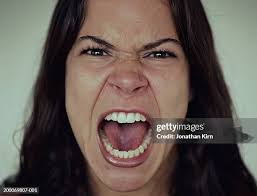
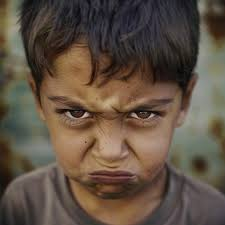
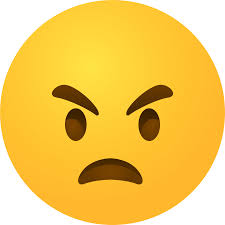
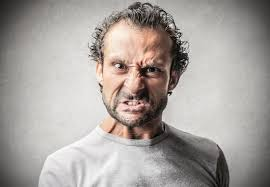
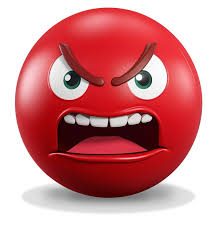
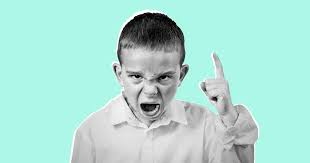
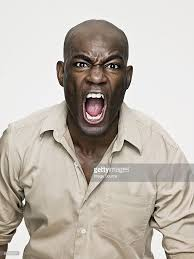
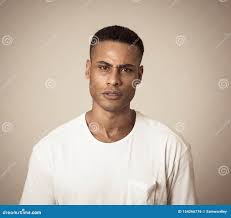
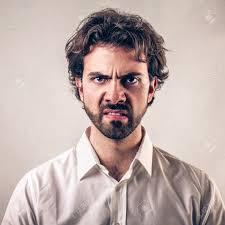
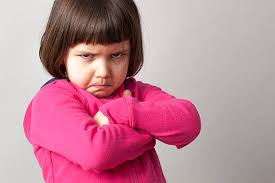
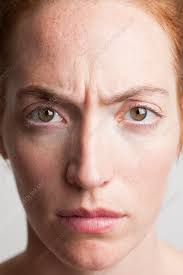
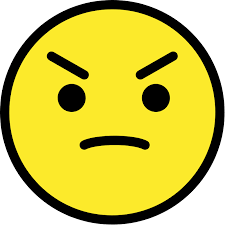
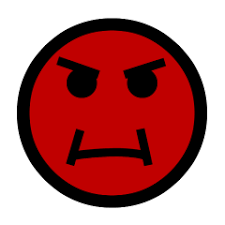
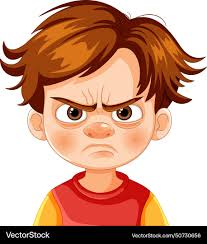
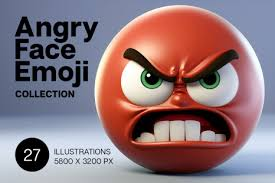
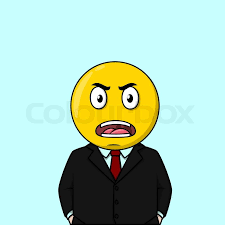
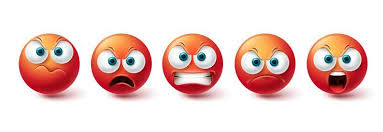
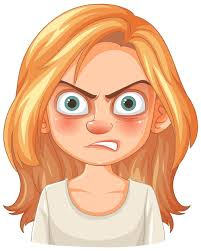
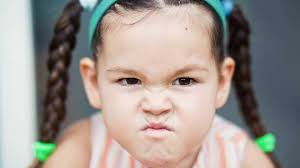
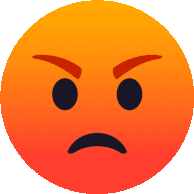
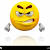
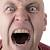
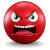
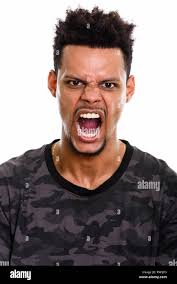
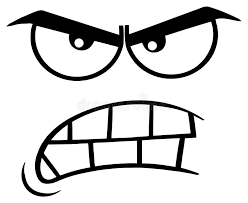
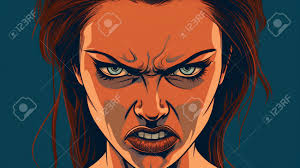
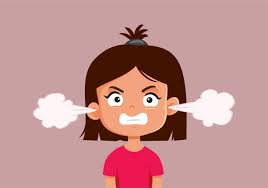
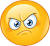
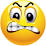
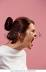
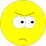
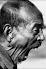
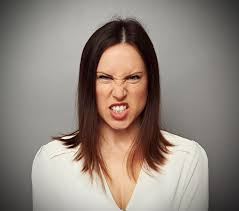
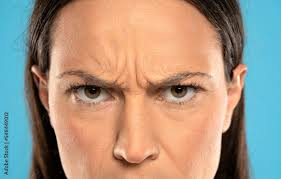
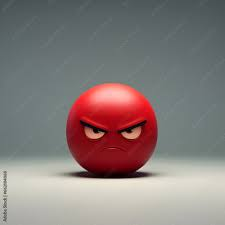
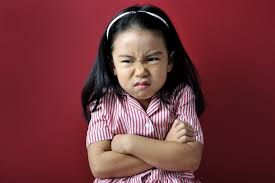
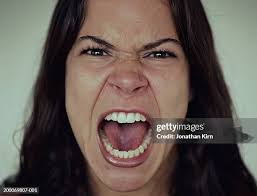
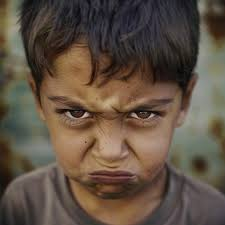
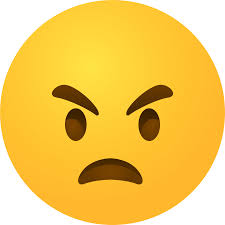
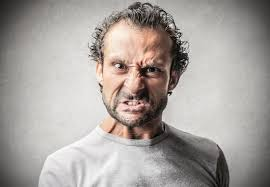
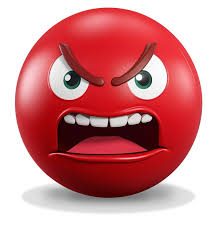
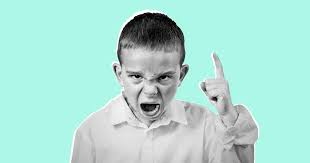
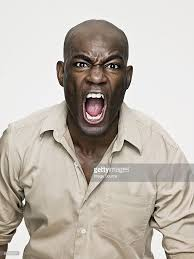
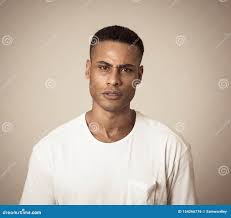
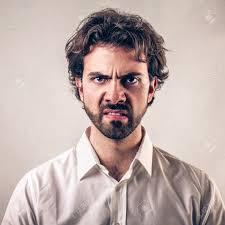
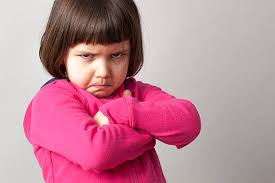
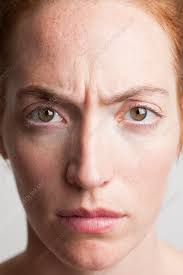
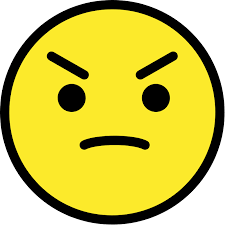
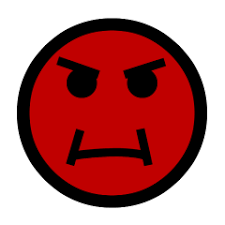
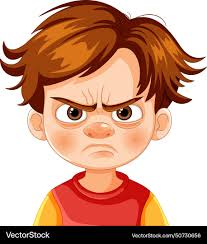
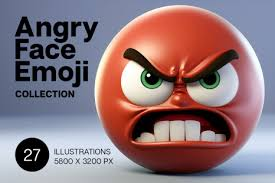
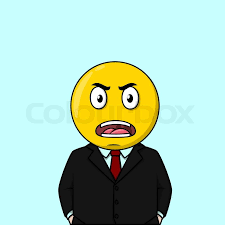
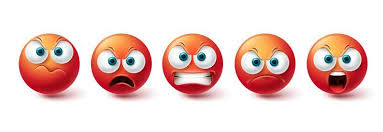
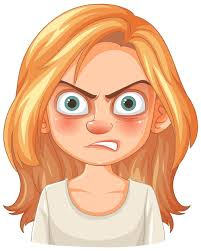
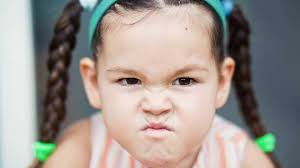
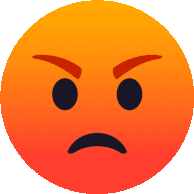
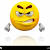
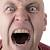
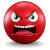
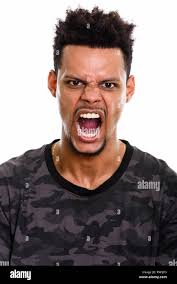
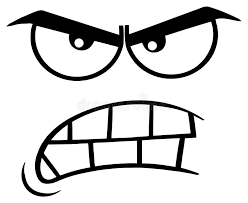
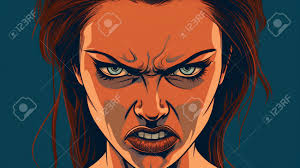
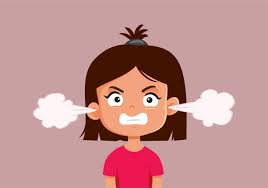
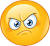
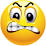
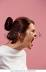
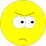
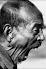
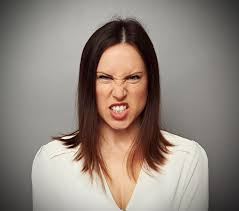
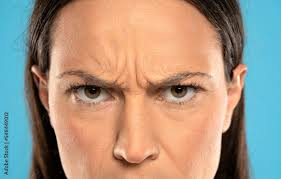
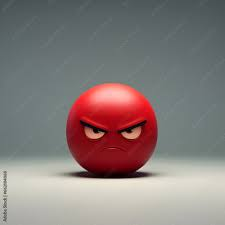
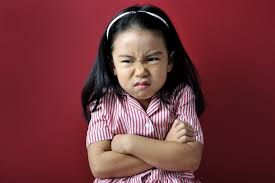
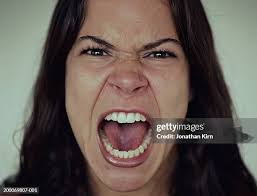
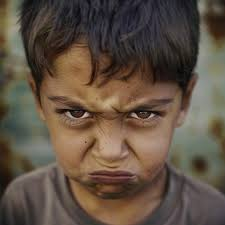
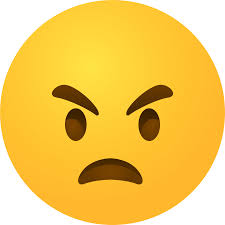
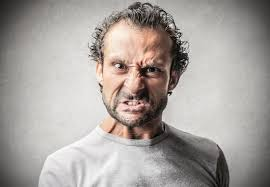
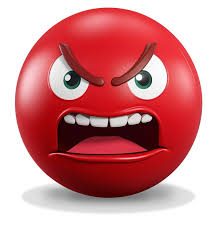
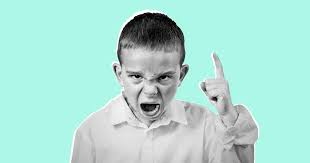
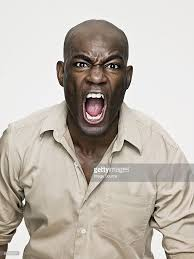
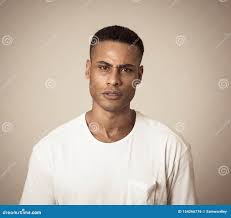
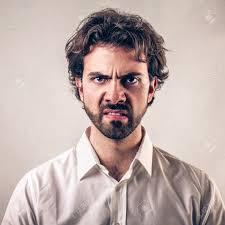
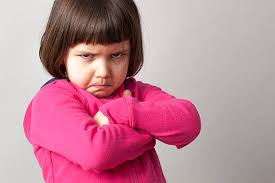
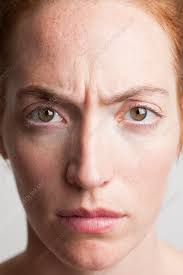
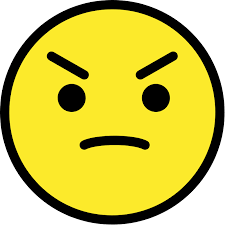
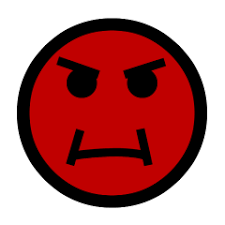
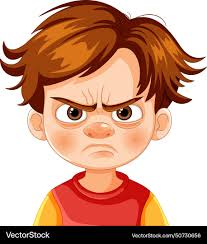
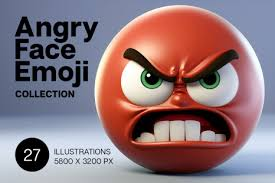
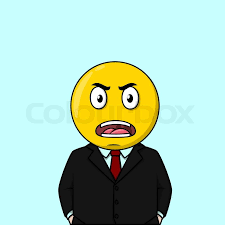
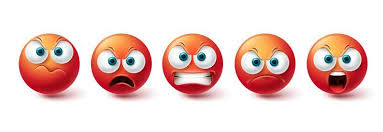
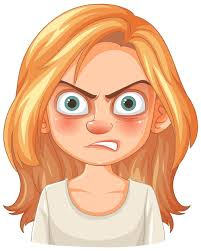
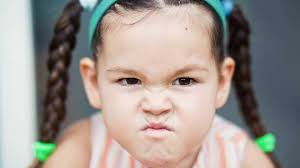
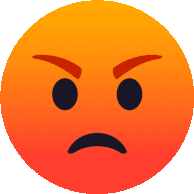
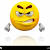
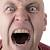
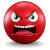
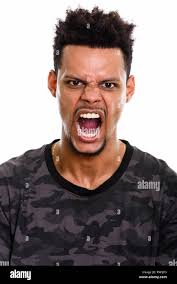
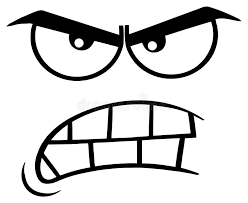
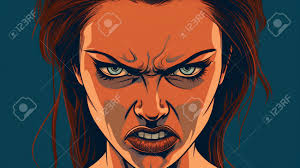
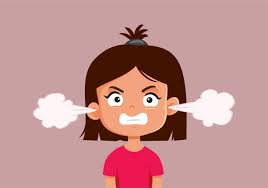
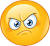
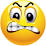
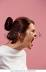
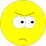
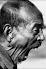
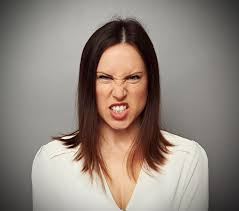
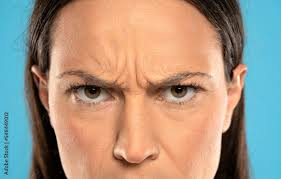
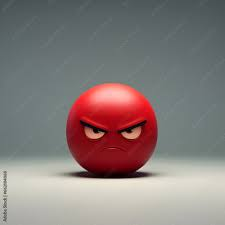
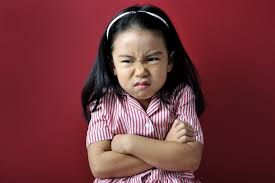
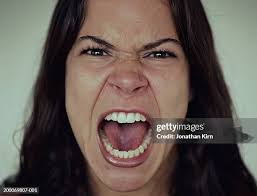
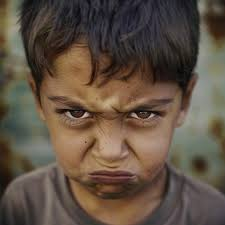
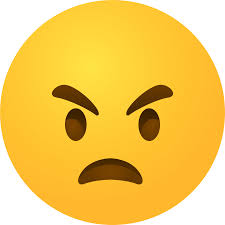
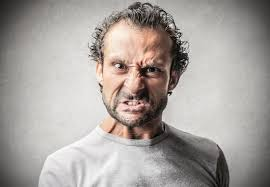
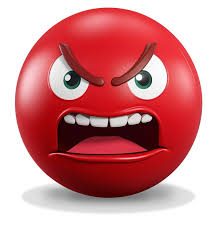
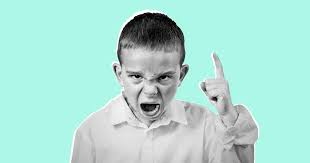
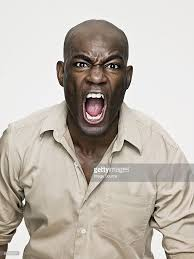
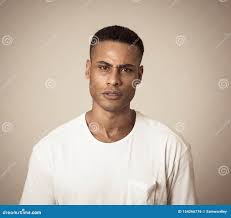
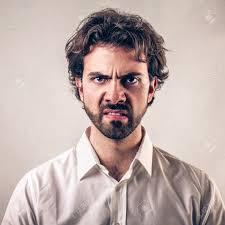
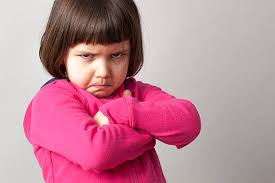
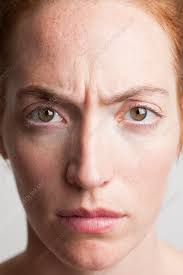
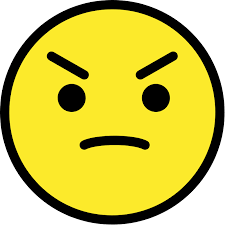
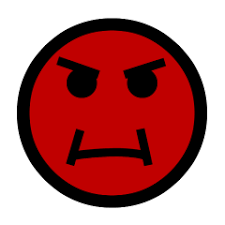
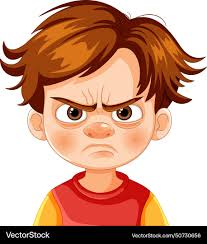
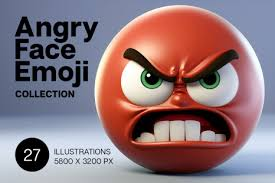
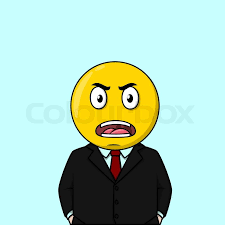
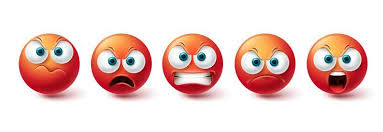
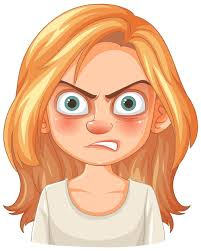
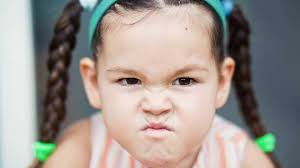
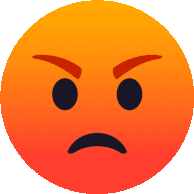
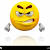
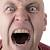
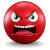
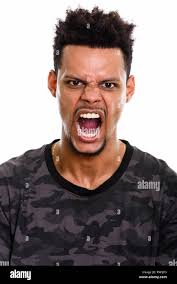
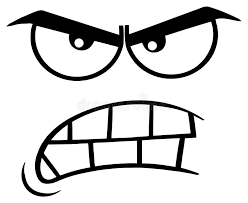
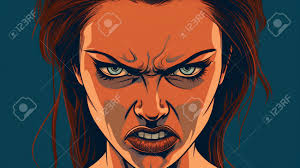
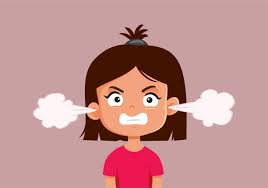

In [12]:
image_urls